In [1]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM, Reshape

import numpy as np
import pandas

np.random.seed(10)
print (tf.__version__)

# !pip show tensorflow

2024-12-12 12:57:08.586623: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 12:57:08.592936: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-12-12 12:57:08.592959: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.3


In [4]:
data = pandas.read_csv('colors.csv')
data.head()

,name,red,green,blue
0,parakeet,174,182,87
1,saddle brown,88,52,1
2,cucumber crush,222,237,215
3,pool blue,134,194,201
4,distance,98,110,130


In [3]:
len(data)

14157

In [5]:
names = data["name"]

## Visualize the name string length distribution

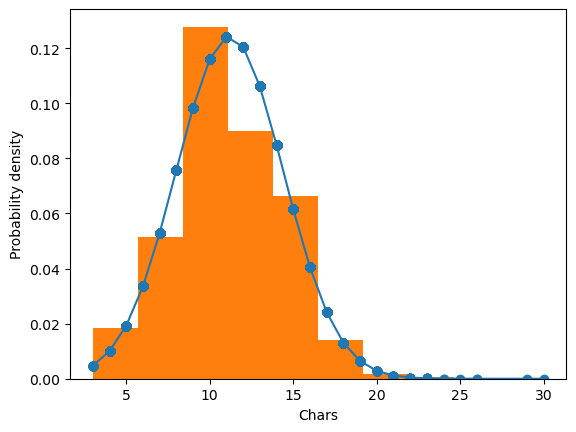

In [6]:
h = sorted(names.str.len().values)
import numpy as np
import scipy.stats as stats
import pylab as plt

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,density=True)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [7]:
np.array(h).max()

30

## Tokenize, char level

In [8]:
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

## One-hot encoding

In [9]:
from keras.utils import np_utils
one_hot_names = np_utils.to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes

28

In [10]:
one_hot_names.shape

(14157, 25, 28)

In [16]:
t.word_index

{'e': 1,
 'a': 2,
 'r': 3,
 ' ': 4,
 'i': 5,
 'n': 6,
 'l': 7,
 'o': 8,
 't': 9,
 's': 10,
 'c': 11,
 'u': 12,
 'd': 13,
 'g': 14,
 'p': 15,
 'h': 16,
 'm': 17,
 'b': 18,
 'y': 19,
 'w': 20,
 'k': 21,
 'f': 22,
 'v': 23,
 'z': 24,
 'q': 25,
 'j': 26,
 'x': 27}

In [11]:
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])


In [12]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, num_classes)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

2024-12-12 12:57:35.239260: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-12-12 12:57:35.239278: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-12-12 12:57:35.239291: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2024-12-12 12:57:35.239501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25, 256)           291840    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 505,859
Trainable params: 505,859
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.load_weights('model_1.h5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'model_1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [13]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/40
399/399 [==============================] - 25s 58ms/step - loss: 0.0603 - acc: 0.6231 - val_loss: 0.0589 - val_acc: 0.6695
Epoch 2/40
399/399 [==============================] - 27s 68ms/step - loss: 0.0551 - acc: 0.6623 - val_loss: 0.0557 - val_acc: 0.6751
Epoch 3/40
399/399 [==============================] - 26s 66ms/step - loss: 0.0523 - acc: 0.6678 - val_loss: 0.0541 - val_acc: 0.6624
Epoch 4/40
399/399 [==============================] - 29s 73ms/step - loss: 0.0500 - acc: 0.6648 - val_loss: 0.0513 - val_acc: 0.6504
Epoch 5/40
399/399 [==============================] - 28s 70ms/step - loss: 0.0475 - acc: 0.6671 - val_loss: 0.0504 - val_acc: 0.6758
Epoch 6/40
399/399 [==============================] - 28s 70ms/step - loss: 0.0455 - acc: 0.6711 - val_loss: 0.0481 - val_acc: 0.6709
Epoch 7/40
399/399 [==============================] - 25s 63ms/step - loss: 0.0434 - acc: 0.6755 - val_loss: 0.0475 - val_acc: 0.6886
Epoch 8/40
399/399 [==============================] - 26s 65ms

In [23]:
# Optionally continue to train with all data, this will likely overfit the training data.
model.fit(one_hot_names, normalized_values,
                    epochs=10,
                    batch_size=32)

Epoch 1/10
14157/14157 [==============================] - 35s 2ms/step - loss: 0.0112 - acc: 0.8073
Epoch 2/10
14157/14157 [==============================] - 35s 2ms/step - loss: 0.0085 - acc: 0.8152
Epoch 3/10
14157/14157 [==============================] - 34s 2ms/step - loss: 0.0075 - acc: 0.8210
Epoch 4/10
14157/14157 [==============================] - 34s 2ms/step - loss: 0.0070 - acc: 0.8222
Epoch 5/10
14157/14157 [==============================] - 33s 2ms/step - loss: 0.0068 - acc: 0.8286
Epoch 6/10
14157/14157 [==============================] - 33s 2ms/step - loss: 0.0065 - acc: 0.8269
Epoch 7/10
14157/14157 [==============================] - 34s 2ms/step - loss: 0.0065 - acc: 0.8342
Epoch 8/10
14157/14157 [==============================] - 32s 2ms/step - loss: 0.0063 - acc: 0.8353
Epoch 9/10
14157/14157 [==============================] - 34s 2ms/step - loss: 0.0061 - acc: 0.8374
Epoch 10/10
14157/14157 [==============================] - 34s 2ms/step - loss: 0.0061 - acc: 0.8380

In [14]:
# Save the model parameters for later use.
model.save_weights('model_1.h5')

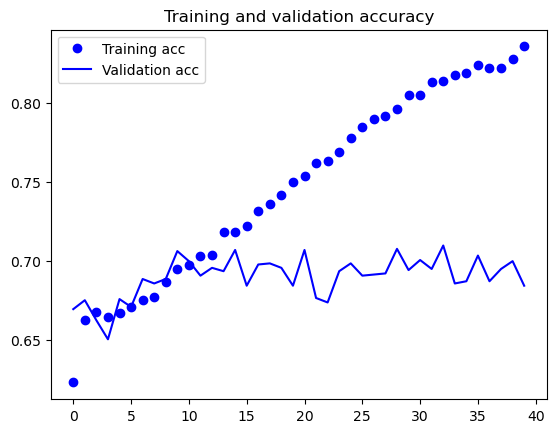

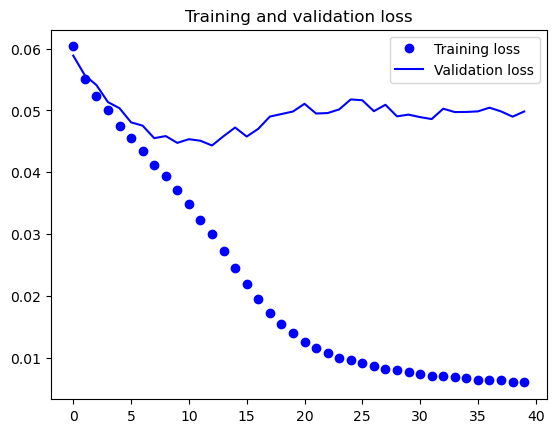

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [16]:
# Plot a color image.
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [17]:
def scale(n):
    return int(n * 255) 

In [18]:
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = np_utils.to_categorical(padded, num_classes=num_classes)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

light blue, R,G,B: 181 209 245


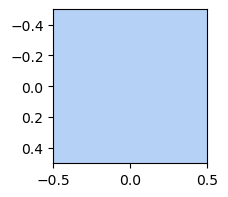

blue, R,G,B: 7 38 200


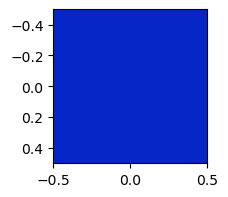

dark blue, R,G,B: 10 11 122


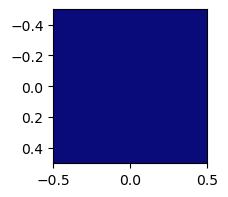

In [19]:
predict("light blue")
predict("blue")
predict("dark blue")

black, R,G,B: 17 32 25


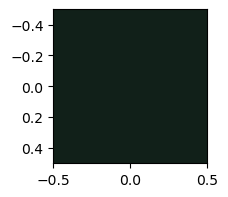

white, R,G,B: 241 241 233


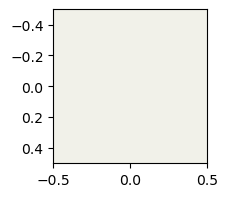

In [20]:
predict("black")
predict("white")

tensorflow orange, R,G,B: 245 136 39


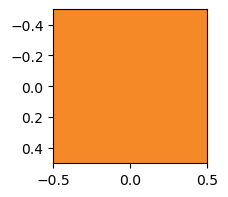

forest, R,G,B: 31 63 37


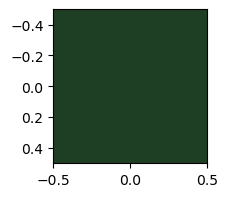

evergreen, R,G,B: 21 68 29


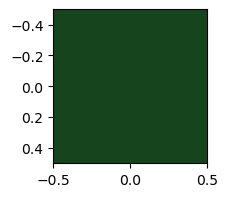

tangerine, R,G,B: 245 136 37


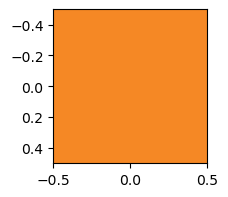

In [21]:
predict("tensorflow orange")
predict("forest")
predict("evergreen")
predict("tangerine")

princess ivory, R,G,B: 239 230 219


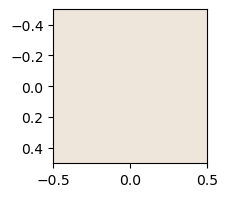

In [22]:
predict("princess ivory")

bull cream, R,G,B: 206 224 228


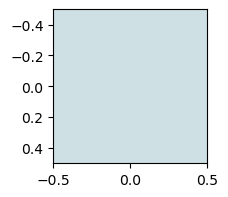

In [23]:
predict("bull cream")

keras red, R,G,B: 160 56 51


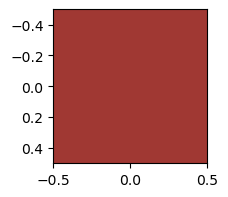

In [24]:
predict("keras red")

tensorflow orange, R,G,B: 245 136 39


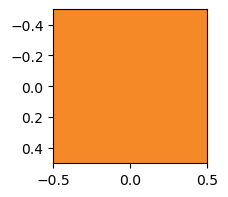

forest, R,G,B: 31 63 37


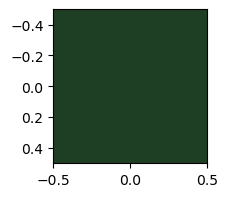

bull cream, R,G,B: 206 224 228


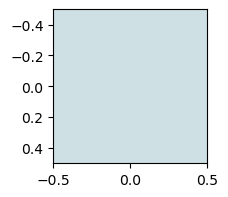

keras red, R,G,B: 160 56 51


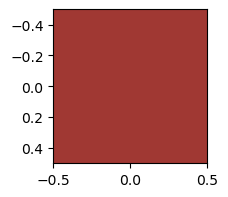

In [25]:
predict("tensorflow orange")
predict("forest")
predict("bull cream")
predict("keras red")

light greenish grey, R,G,B: 195 216 189


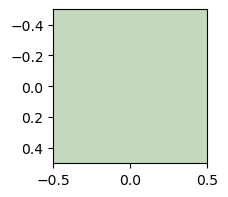

In [29]:
predict("light greenish grey")